In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
absor1 = pd.read_csv('/Users/huihaoz/Downloads/GeometricA_Earth_HighCloud_UltraRes1.dat', comment = '#', delimiter='\s+')
absor2 = pd.read_csv('/Users/huihaoz/Downloads/mktrans_zmnq_16_15.dat', comment = '#', delimiter='\s+')
pts=pd.read_csv('/Users/huihaoz/Downloads/PT_PES2.txt', sep=',')
pts["Teq"] = (pts.STK * ((pts.SRadiusSun *  const.R_sun/(2*pts.SMAAU * const.au)))**(1/2) * (1-0.3)**(0.25))
pts.iloc[14,8]=249.7 #TRAPPIST-1 e
# Split a Python List into Chunks using For Loops
our_list = np.array(absor1.albH2O[:1079300])
chunked_list = list()
chunk_size = 251*2*5
for i in range(0, len(our_list), chunk_size):
    chunked_list.append(our_list[i:i+chunk_size])
    
our_listwl = np.array(absor1.nm[:1079300] / 1000)
chunked_listwl = list()
chunk_sizewl = 251*2*5
for i in range(0, len(our_listwl), chunk_sizewl):
    chunked_listwl.append(our_listwl[i:i+chunk_sizewl])
    
y_fit_index = np.linspace(0,429,430,dtype = int)
wl_fit_index = [np.argmax(chunked_list[i]) for i in y_fit_index] #just for check

pn_fit_non = [max(chunked_list[i]) for i in y_fit_index]
wl_fit_non = [chunked_listwl[i][np.argmax(chunked_list[i])] for i in y_fit_index] ###envelop
alb_nogas = np.interp(absor1.nm/1000,wl_fit_non,np.array(pn_fit_non))
wl_um2 = np.array(absor1.nm[:1079300])/1000 * u.um
my_list_norabd = (absor1.totalb / alb_nogas)

# Iterate over the list and replace any value greater than 1 with 1
for i in range(len(my_list_norabd)):
    if my_list_norabd[i] > 1:
        my_list_norabd[i] = 1
tbd_planet=[]

for i in range(len(pts.Teq)):
    tbd_planet.append(np.array(my_list_norabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
dis_2 = pts.DistancePC* const.pc
d_s_2 = pts.RadiusEar * const.R_earth
ste = (d_s_2**2 * np.pi / dis_2**2)
tbd_planet_earth = []
for i in range(len(tbd_planet)):

    tbd_planet_earth.append((tbd_planet[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))

Flux_tbd_planet_earth =[]
for i in range(len(tbd_planet_earth)):
    Flux_tbd_planet_earth.append((tbd_planet_earth[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))


f_tra0 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra1 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra2 = pd.read_csv('/Users/huihaoz/Downloads/lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra3 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra4 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra5 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra6 = pd.read_csv('/Users/huihaoz/Downloads/lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra7 = pd.read_csv('/Users/huihaoz/Downloads/lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra8 = pd.read_csv('/Users/huihaoz/Downloads/lte030.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra9 = pd.read_csv('/Users/huihaoz/Downloads/lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra10 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra11 = pd.read_csv('/Users/huihaoz/Downloads/lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra12 = pd.read_csv('/Users/huihaoz/Downloads/lte029.0-5.5-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra13 = pd.read_csv('/Users/huihaoz/Downloads/lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_tra14 = pd.read_csv('/Users/huihaoz/Downloads/lte026.0-5.0-0.0a+0.0.BT-Settl.spec.7.txt', comment = '#', delimiter='\s+')
f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA)])
f_tra1_fum0=[10**(i-8) * u.erg/(u.s * u.cm**2 *u.Angstrom) for i in f_traErgsseccmA]
f_traAng=np.array([np.array(f_tra0.Angstroem / 10000),np.array(f_tra1.Angstroem / 10000),np.array(f_tra2.Angstroem / 10000),np.array(f_tra3.Angstroem / 10000),np.array(f_tra4.Angstroem / 10000),np.array(f_tra5.Angstroem / 10000),np.array(f_tra6.Angstroem / 10000),np.array(f_tra7.Angstroem / 10000),np.array(f_tra8.Angstroem / 10000),np.array(f_tra9.Angstroem / 10000),np.array(f_tra10.Angstroem / 10000),np.array(f_tra11.Angstroem / 10000),np.array(f_tra12.Angstroem / 10000),np.array(f_tra13.Angstroem / 10000),np.array(f_tra14.Angstroem / 10000)])


/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1984/2632884893.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f_traErgsseccmA=np.array([np.array(f_tra0.ErgsseccmA),np.array(f_tra1.ErgsseccmA),np.array(f_tra2.ErgsseccmA),np.array(f_tra3.ErgsseccmA),np.array(f_tra4.ErgsseccmA),np.array(f_tra5.ErgsseccmA),np.array(f_tra6.ErgsseccmA),np.array(f_tra7.ErgsseccmA),np.array(f_tra8.ErgsseccmA),np.array(f_tra9.ErgsseccmA),np.array(f_tra10.ErgsseccmA),np.array(f_tra11.ErgsseccmA),np.array(f_tra12.ErgsseccmA),np.array(f_tra13.ErgsseccmA),np.array(f_tra14.ErgsseccmA)])
/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1984/2632884893.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

ValueError: x and y must have same first dimension, but have shapes (1079300,) and (1700000,)

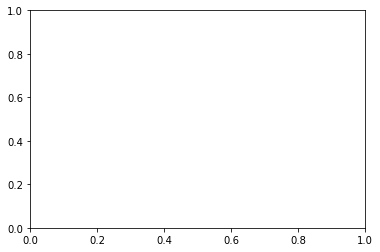

In [28]:
plt.plot(absor1.nm[:1079300],alb_nogas)

In [26]:
wl_fit_non

[0.500109385,
 0.5034867049999999,
 0.507679949,
 0.51158525,
 0.5138945549999999,
 0.5176140060000001,
 0.517642611,
 0.5235209,
 0.523844061,
 0.529537876,
 0.530648609,
 0.535223328,
 0.5370540989999999,
 0.540556431,
 0.5444437809999999,
 0.5467968990000001,
 0.551392744,
 0.554816093,
 0.557350059,
 0.5592835589999999,
 0.562248176,
 0.567077034,
 0.5696302719999999,
 0.5741456309999999,
 0.576818348,
 0.58106012,
 0.5825618899999999,
 0.5876585710000001,
 0.5886160159999999,
 0.594500302,
 0.5980370380000001,
 0.598144457,
 0.604683456,
 0.608301783,
 0.610701647,
 0.6150509510000001,
 0.6189051510000001,
 0.6220626109999999,
 0.626360125,
 0.630041424,
 0.632768872,
 0.637219577,
 0.640177066,
 0.644754103,
 0.648401659,
 0.652268071,
 0.655503662,
 0.659754141,
 0.66361337,
 0.666277472,
 0.6710272119999999,
 0.675236849,
 0.679197592,
 0.6828009859999999,
 0.687056009,
 0.6910813050000001,
 0.694878936,
 0.69891466,
 0.7030401900000001,
 0.706714748,
 0.709370553,
 0.714893189

(0.0, 1.5)

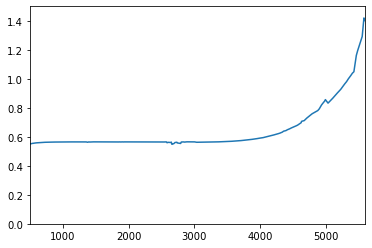

In [29]:
plt.plot(absor1.nm,alb_nogas)
plt.xlim(500,5600)
plt.ylim(0,1.5)

In [3]:
print(pts.to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
{} &              Planet &  MassEar &  RadiusEar &     SMAAU &  DistancePC &  SRadiusSun &  Slogg &     STK &         Teq \\
\midrule
0  &           GJ 1002 c &    1.360 &   1.089911 &  0.073800 &    4.848670 &      0.1400 &  5.100 &  3024.0 &  183.706884 \\
1  &           GJ 1061 d &    1.640 &   1.148567 &  0.054000 &    3.672780 &      0.1600 &  5.160 &  2953.0 &  224.199359 \\
2  &           GJ 15 A b &    3.030 &   1.592166 &  0.072000 &    3.562280 &      0.3800 &  4.870 &  3607.0 &  365.493367 \\
3  &            GJ 251 b &    4.000 &   1.875654 &  0.081800 &    5.580570 &      0.3600 &  4.960 &  3451.0 &  319.320915 \\
4  &            GJ 273 b &    2.890 &   1.548342 &  0.091101 &    5.921535 &      0.2900 &  4.910 &  3382.0 &  266.145323 \\
5  &            GJ 411 b &    2.690 &   1.484195 &  0.078790 &    2.550000 &      0.3700 &  4.890 &  3719.0 &  355.467007 \\
6  &            GJ 625 b &    2.820 &   1.526104 &  0.078361 &    6.472490 &   

/var/folders/6t/cpjtlkn10wv603vnph9nr3sh0000gn/T/ipykernel_1984/2393228939.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pts.to_latex())


In [4]:
f_ref_earth_fit =[]
for i in range(len(f_tra1_fum0)):

    f_ref_earth_fit.append(np.interp(absor1.nm[:1079300]/1000,f_traAng[i],f_tra1_fum0[i]))

In [5]:
Flux_surface = []
for i in range(len(f_ref_earth_fit)):
    Flux_surface.append((f_ref_earth_fit[i][1:] * np.diff(absor1.nm[:1079300]/1000) * u.um).to(u.W/u.m**2))

In [6]:
df = (pts.SRadiusSun * const.R_sun / (pts.SMAAU * const.au))**2

f_ref_p = np.array(Flux_surface)* np.array(df).reshape(-1,1)
f_ref_earth = f_ref_p* np.pi * np.array(((pts.RadiusEar * const.R_earth)**2 / (4 * np.pi * (pts.DistancePC * const.pc)**2))).reshape(-1,1)
f_ref_earth_fit = f_ref_earth 

modern_earth_abd_fit = np.array(my_list_norabd[1:1079300])*0.3
f_ref_planet_earth_fit = [i * modern_earth_abd_fit for i in f_ref_earth_fit] #w/m2
flux_tot = np.array(f_ref_planet_earth_fit)+np.array(Flux_tbd_planet_earth)
wl_um_check = np.linspace(0.5,6,5500) * u.um

Range_min=wl_um_check-np.diff(wl_um_check)[1]*0.5
Range_max=wl_um_check+np.diff(wl_um_check)[1]*0.5
bin_range=[]
for i in range(len(wl_um_check)):
    bin_range.append(np.where((absor1.nm[1:1079300]/1000 < Range_max[i]/u.um) & (absor1.nm[1:1079300]/1000 > Range_min[i]/u.um)))
flux_bin = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot)):
    for i in range(len(bin_range)):
        flux_bin[a].append(np.sum(flux_tot[a][bin_range[i]]))
        

# NO GAS
# in this case, earth frans=1(for thermal), albedo=0.3 (for ref)
my_list_Noabd = alb_nogas*0+1
tbd_planet_no=[]

for i in range(len(pts.Teq)):
    tbd_planet_no.append(np.array(my_list_Noabd[:1079300]) * 2 * const.h *const.c**2 / ((wl_um2)**5 * (np.e**(const.c * const.h / (wl_um2 *const.k_B * pts.Teq[i] * u.K)) - 1)))
tbd_planet_earth_no = []
for i in range(len(tbd_planet_no)):
    tbd_planet_earth_no.append((tbd_planet_no[i] * ste[i]).to(u.erg/(u.s * u.cm**2 * u.um)))
Flux_tbd_planet_earth_no =[]
for i in range(len(tbd_planet_earth_no)):
    Flux_tbd_planet_earth_no.append((tbd_planet_earth_no[i][1:] * np.diff(wl_um2)).to(u.W/u.m**2))
##
modern_earth_abd_fit_no = np.array(my_list_norabd[1:1079300])*0 + 0.3
f_ref_planet_earth_fit_no = [i * modern_earth_abd_fit_no for i in f_ref_earth_fit]
flux_tot_no = np.array(f_ref_planet_earth_fit_no)+np.array(Flux_tbd_planet_earth_no)

flux_bin_no = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(flux_tot_no)):
    for i in range(len(bin_range)):
        flux_bin_no[a].append(np.sum(flux_tot_no[a][bin_range[i]]))

---

# Star

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.nddata import NDData

In [8]:
h = const.h
wl_um = np.linspace(0.5,6,5500) * u.um
c = const.c #unit:m/s
wl_m = (wl_um).to(u.m)
pe_1 = h * c / (wl_um).to(u.um)
wl_um_check = np.linspace(0.5,6,5500)*u.um

In [9]:
df_s = (pts.SRadiusSun * const.R_sun / (pts.DistancePC * const.pc))**2
f_s = np.array(Flux_surface)*np.array(df_s).reshape(-1,1)
f_s_fit = f_s 
flux_bin_s = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#W/m**2
for a in range(len(f_s_fit)):
    for i in range(len(bin_range)):
        flux_bin_s[a].append(np.sum(f_s_fit[a][bin_range[i]]))

In [10]:
R = 150.0 # here we set Reseolution = 1000
t = 60*60.0 *u.s # here we set time = 1h with unit:s
S = (3930 * 0.5)**2 * np.pi *u.cm * u.cm #here we set diameter as the first diameter with unit:cm

In [11]:
pn_0_elt=(np.array(flux_bin_s[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1_elt=(np.array(flux_bin_s[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2_elt=(np.array(flux_bin_s[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3_elt=(np.array(flux_bin_s[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4_elt=(np.array(flux_bin_s[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5_elt=(np.array(flux_bin_s[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6_elt=(np.array(flux_bin_s[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7_elt=(np.array(flux_bin_s[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8_elt=(np.array(flux_bin_s[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9_elt=(np.array(flux_bin_s[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10_elt=(np.array(flux_bin_s[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11_elt=(np.array(flux_bin_s[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12_elt=(np.array(flux_bin_s[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13_elt=(np.array(flux_bin_s[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14_elt=(np.array(flux_bin_s[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [12]:
phe_1e=[i * u.W/u.m**2 for i in flux_bin] #new method

In [13]:
pn_0e_elt=(np.array(phe_1e[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt=(np.array(phe_1e[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt=(np.array(phe_1e[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt=(np.array(phe_1e[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt=(np.array(phe_1e[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt=(np.array(phe_1e[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt=(np.array(phe_1e[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt=(np.array(phe_1e[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt=(np.array(phe_1e[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt=(np.array(phe_1e[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt=(np.array(phe_1e[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt=(np.array(phe_1e[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt=(np.array(phe_1e[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt=(np.array(phe_1e[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt=(np.array(phe_1e[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

# Noise

In [14]:
pe_1 = h * c / (wl_um).to(u.um) #energy of photon
ste_atmo2 = ((2*u.um / (39.3*u.m))**2 * u.steradian).to(u.arcsec**2) #ste
n_s = pd.read_csv('/Users/huihaoz/Downloads/mk_skybg_zm_16_15_ph.dat.txt', comment = '#', delimiter='\s+')
wl_ns = (np.array(n_s["wavelength(nm)"])*u.nm).to(u.um)
bri_surface = np.array(n_s["ph/sec/arcsec^2/nm/m^2"])*u.ph/(u.m**2 * u.s * u.arcsec**2 *u.nm)
pe_ns = (h * c /wl_ns).to(u.J)/u.ph
st = ste_atmo2
f_n_s = ((bri_surface *pe_ns).to(u.W/(u.m**2 * u.um * u.steradian))*st*np.diff(wl_ns)[1]).to(u.W/u.m**2)
bin_range_n = []

for i in range(len(wl_um)):
    bin_range_n.append(np.where((wl_ns/u.um < Range_max[i]/u.um) & (wl_ns/u.um > Range_min[i]/u.um)))
f_r_n=[]
for i in range(len(bin_range_n)):
    f_r_n.append(np.sum(f_n_s[bin_range_n[i]]).value)
pe_e = (h * c / wl_um).to(u.J)
noif_sky =(np.array(f_r_n)*u.W/u.m**2)
pnsky_1_elt=(noif_sky*S*t*wl_um/(pe_1*u.um)).to(u.m/u.m)

In [15]:
c_1 = 10**(-4)
n_0 = (pn_0e_elt+c_1*pn_0_elt+pnsky_1_elt)**(1/2)
n_1 = (pn_1e_elt+c_1*pn_1_elt+pnsky_1_elt)**(1/2)
n_2 = (pn_2e_elt+c_1*pn_2_elt+pnsky_1_elt)**(1/2)
n_3 = (pn_3e_elt+c_1*pn_3_elt+pnsky_1_elt)**(1/2)
n_4 = (pn_4e_elt+c_1*pn_4_elt+pnsky_1_elt)**(1/2)
n_5 = (pn_5e_elt+c_1*pn_5_elt+pnsky_1_elt)**(1/2)
n_6 = (pn_6e_elt+c_1*pn_6_elt+pnsky_1_elt)**(1/2)
n_7 = (pn_7e_elt+c_1*pn_7_elt+pnsky_1_elt)**(1/2)
n_8 = (pn_8e_elt+c_1*pn_8_elt+pnsky_1_elt)**(1/2)
n_9 = (pn_9e_elt+c_1*pn_9_elt+pnsky_1_elt)**(1/2)
n_10 = (pn_10e_elt+c_1*pn_10_elt+pnsky_1_elt)**(1/2)
n_11 = (pn_11e_elt+c_1*pn_11_elt+pnsky_1_elt)**(1/2)
n_12 = (pn_12e_elt+c_1*pn_12_elt+pnsky_1_elt)**(1/2)
n_13 = (pn_13e_elt+c_1*pn_13_elt+pnsky_1_elt)**(1/2)
n_14 = (pn_14e_elt+c_1*pn_14_elt+pnsky_1_elt)**(1/2)

# No gas

In [16]:
phe_1e_nogas=[i * u.W/u.m**2 for i in flux_bin_no] #changed

In [17]:
pn_0e_elt_nogas=(np.array(phe_1e_nogas[0])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_1e_elt_nogas=(np.array(phe_1e_nogas[1])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_2e_elt_nogas=(np.array(phe_1e_nogas[2])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_3e_elt_nogas=(np.array(phe_1e_nogas[3])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_4e_elt_nogas=(np.array(phe_1e_nogas[4])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_5e_elt_nogas=(np.array(phe_1e_nogas[5])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_6e_elt_nogas=(np.array(phe_1e_nogas[6])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_7e_elt_nogas=(np.array(phe_1e_nogas[7])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_8e_elt_nogas=(np.array(phe_1e_nogas[8])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_9e_elt_nogas=(np.array(phe_1e_nogas[9])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_10e_elt_nogas=(np.array(phe_1e_nogas[10])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_11e_elt_nogas=(np.array(phe_1e_nogas[11])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_12e_elt_nogas=(np.array(phe_1e_nogas[12])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_13e_elt_nogas=(np.array(phe_1e_nogas[13])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)
pn_14e_elt_nogas=(np.array(phe_1e_nogas[14])*u.W/u.m**2 *S*t*wl_um_check/(u.um*pe_1)).to(u.m/u.m)

In [18]:
dn = np.array([pn_0e_elt_nogas-pn_0e_elt,pn_1e_elt_nogas-pn_1e_elt,pn_2e_elt_nogas-pn_2e_elt,pn_3e_elt_nogas-pn_3e_elt,pn_4e_elt_nogas-pn_4e_elt,pn_5e_elt_nogas-pn_5e_elt,pn_6e_elt_nogas-pn_6e_elt,pn_7e_elt_nogas-pn_7e_elt,pn_8e_elt_nogas-pn_8e_elt,pn_9e_elt_nogas-pn_9e_elt,pn_10e_elt_nogas-pn_10e_elt,pn_11e_elt_nogas-pn_11e_elt,pn_12e_elt_nogas-pn_12e_elt,pn_13e_elt_nogas-pn_13e_elt,pn_14e_elt_nogas-pn_14e_elt])
dnr = np.array([n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,n_11,n_12,n_13,n_14])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


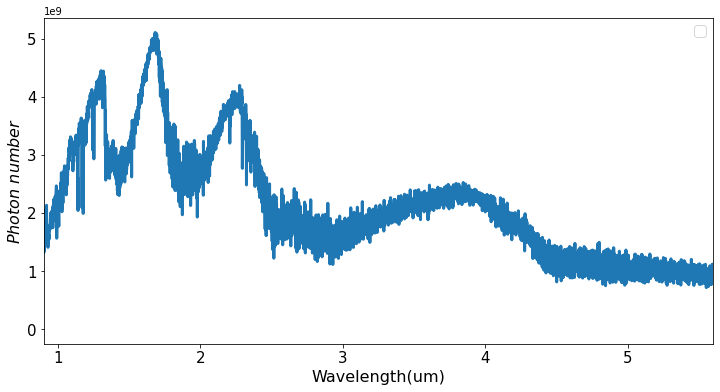

In [19]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um_check,pn_14_elt,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


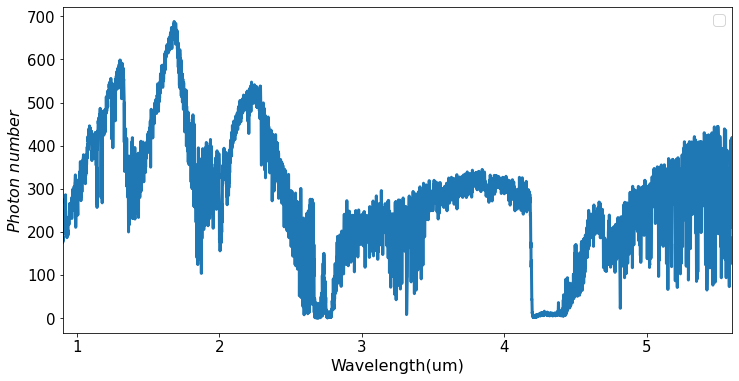

In [20]:
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um_check,pn_14e_elt,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

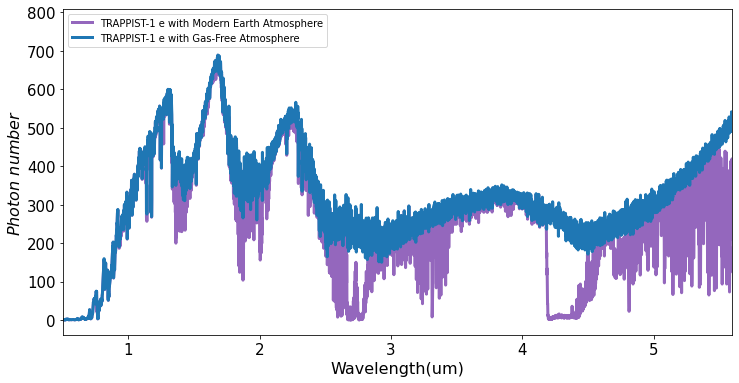

In [22]:
%matplotlib inline
plt.figure(figsize=(12, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
plt.plot(wl_um_check,pn_14e_elt,linewidth=3,color = '#9467bd',label="TRAPPIST-1 e with Modern Earth Atmosphere", )
plt.plot(wl_um_check,pn_14e_elt_nogas,linewidth=3,color = '#1f77b4' ,label="TRAPPIST-1 e with Gas-Free Atmosphere")
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0.5,5.6)
#plt.ylim(0,9)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 10},loc='upper left')

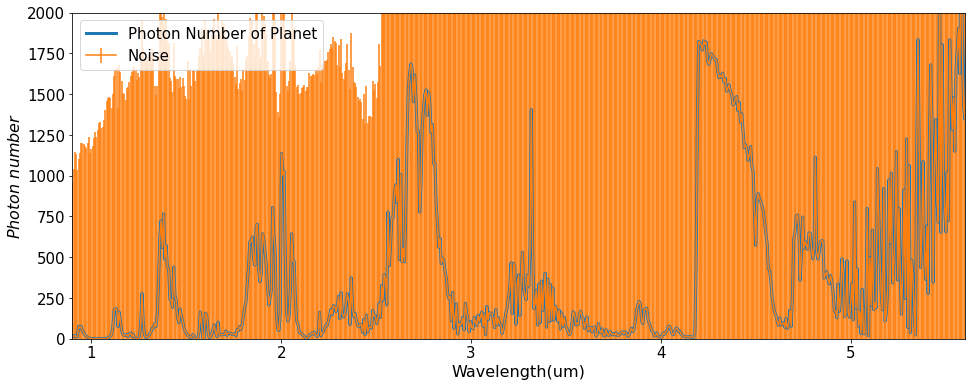

In [42]:
plt.figure(figsize=(16, 6))
#plt.plot(wl_um_check, tbd_tra1_erg_check/(1/ang2_1.to(u.steradian)),'-',color = '#1f77b4', label='Blackbody flux we simulated',linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
#plt.plot(wl_um_check,pn_14e_elt,linewidth=3,color = '#1f77b4' )
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
plt.errorbar(wl_um_check ,pn_14e_elt_nogas-pn_14e_elt,yerr= n_14,fmt = '-',color = '#ff7f0e',label="Noise")
plt.plot(wl_um_check,pn_14e_elt_nogas-pn_14e_elt,linewidth=3,color = '#1f77b4',label="Photon Number of Planet")
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0.9,5.6)
plt.ylim(0,2000)
#plt.title("ELT-R150-TRA1")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

# Check, Blackbody

In [43]:
T_tra1e =249.7
tbd_tra1e = 2 * const.h *const.c**2 / ((wl_um)**5 * (np.e**(const.c * const.h / (wl_um *const.k_B * T_tra1e * u.K)) - 1))
tbd_tra1 = 2 * const.h *const.c**2 / ((wl_um)**5 * (np.e**(const.c * const.h / (wl_um *const.k_B * 2600 * u.K)) - 1))


In [44]:
#150 means wavelength term of equation
dis_2 = 12.1 * u.parsec
d_s_2 = 0.92 * const.R_earth
ang2_2 = (d_s_2**2 *np.pi / dis_2**2).to(u.m/u.m)
# print(ang2)

#150 means wavelength term of equation

dis_3 = 0.02925*const.au
d_s_3 = const.R_sun*0.1192
ang3_3 = (d_s_3**2 *np.pi / dis_3**2).to(u.m/u.m)
# print(ang2

In [45]:
tbd_tra1_erg = (tbd_tra1).to(u.erg / (u.s * u.cm * u.cm * u.um))

In [46]:
tbd_wm=(tbd_tra1_erg).to(u.W/(u.m * u.m*u.um))

F_1_1e = (150**(-1)*u.um * tbd_wm * ang3_3).to(u.W/(u.m * u.m))

#L_1_ref_1e = F_1_1e*np.pi*(0.92 * const.R_earth)**2

F_1_ref_1e = 0.3*F_1_1e*(np.pi*(0.92 * const.R_earth)**2)/(4*np.pi*(12.1 * const.pc)**2)

#F_1_ref_1e = (F_1_1e/(1/ang2_2.to(u.steradian))/u.steradian).to(u.W/(u.m * u.m))

tbd_1e_wm=(tbd_tra1e*150**(-1)*u.um*  ang2_2).to(u.W/u.m**2)


F_1e_earth_it = tbd_1e_wm

F_1e_earth_tot=F_1e_earth_it+F_1_ref_1e

In [47]:
pe_2 = h * c / (wl_um_check).to(u.um)
pn_tbd_1e_tot = (F_1e_earth_tot*t*S*wl_um/(pe_2*u.um)).to(u.m/u.m)

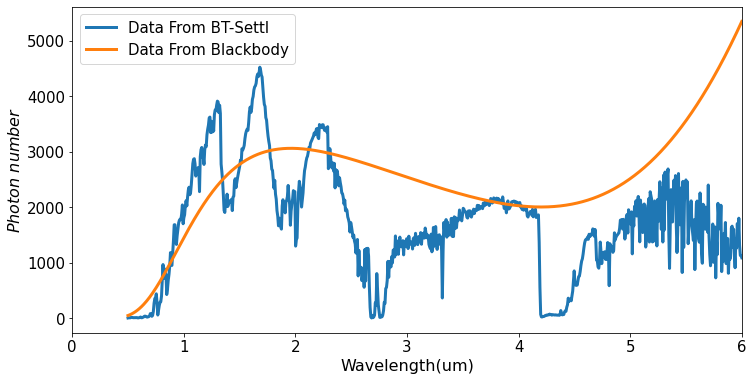

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um_check,pn_14e_elt,linewidth=3,label="Data From BT-Settl" ,color = '#1f77b4')
plt.plot(wl_um_check, pn_tbd_1e_tot,'-',color = '#ff7f0e', label="Data From Blackbody",linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0,6)
#plt.title("ELT-R150-TRA1e")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})

In [49]:
resu_pn = pn_14e_elt-pn_tbd_1e_tot

In [50]:
abs_resu = [abs(i) for i in  resu_pn]

In [51]:
abs_resu

[<Quantity 44.49491015>,
 <Quantity 46.56760607>,
 <Quantity 51.69433329>,
 <Quantity 57.89974006>,
 <Quantity 58.53874313>,
 <Quantity 63.53247523>,
 <Quantity 72.02896539>,
 <Quantity 83.49139472>,
 <Quantity 91.30853443>,
 <Quantity 101.1210195>,
 <Quantity 110.18968346>,
 <Quantity 117.5840575>,
 <Quantity 126.78545862>,
 <Quantity 141.63133432>,
 <Quantity 152.56400055>,
 <Quantity 160.83653218>,
 <Quantity 165.79944403>,
 <Quantity 172.96249031>,
 <Quantity 199.01343079>,
 <Quantity 210.73949157>,
 <Quantity 217.62855714>,
 <Quantity 225.87667813>,
 <Quantity 227.15026317>,
 <Quantity 240.56379072>,
 <Quantity 259.72802846>,
 <Quantity 286.99406493>,
 <Quantity 306.11495522>,
 <Quantity 317.81464651>,
 <Quantity 332.23485483>,
 <Quantity 332.8102132>,
 <Quantity 312.39438411>,
 <Quantity 335.19036146>,
 <Quantity 399.56839275>,
 <Quantity 404.67698441>,
 <Quantity 352.83246622>,
 <Quantity 222.65735446>,
 <Quantity 158.2230742>,
 <Quantity 164.21896584>,
 <Quantity 115.59165363>,

In [52]:
pn_14e_elt

<Quantity [1.07359680e+00, 4.09739196e+00, 4.45322880e+00, 4.12871951e+00,
           9.78047545e+00, 1.14981166e+01, 1.01435538e+01, 6.26270119e+00,
           6.47501225e+00, 5.14718521e+00, 5.02481312e+00, 7.04387432e+00,
           7.72763908e+00, 3.24232399e+00, 3.14835770e+00, 6.19449805e+00,
           1.30311624e+01, 1.81486432e+01, 4.85835972e+00, 6.37141821e+00,
           1.31974434e+01, 1.91370963e+01, 3.25199104e+01, 3.42266090e+01,
           3.06409168e+01, 1.94055605e+01, 1.67606563e+01, 2.19748179e+01,
           2.48983144e+01, 4.20879568e+01, 8.06810205e+01, 7.64649783e+01,
           3.10596130e+01, 4.53060462e+01, 1.16877208e+02, 2.67139509e+02,
           3.52010147e+02, 3.66788138e+02, 4.36514973e+02, 2.68485141e+02,
           5.41664425e+01, 1.37925835e+02, 2.27106382e+02, 2.85829442e+02,
           2.93781855e+02, 3.96528580e+02, 6.67977404e+02, 9.64315298e+02,
           7.13398169e+02, 8.87630593e+02, 8.13271764e+02, 7.86164016e+02,
           4.23828910e+02

In [53]:
abs_resu/pn_14e_elt

<Quantity [4.14447120e+01, 1.13651822e+01, 1.16082815e+01, 1.40236555e+01,
           5.98526559e+00, 5.52546800e+00, 7.10095959e+00, 1.33315309e+01,
           1.41016775e+01, 1.96458871e+01, 2.19291108e+01, 1.66930942e+01,
           1.64067521e+01, 4.36820425e+01, 4.84582805e+01, 2.59644173e+01,
           1.27233042e+01, 9.53032622e+00, 4.09630908e+01, 3.30757587e+01,
           1.64902058e+01, 1.18030800e+01, 6.98495969e+00, 7.02856047e+00,
           8.47650971e+00, 1.47892695e+01, 1.82639003e+01, 1.44626749e+01,
           1.33436686e+01, 7.90749276e+00, 3.87196868e+00, 4.38358015e+00,
           1.28645644e+01, 8.93207460e+00, 3.01883037e+00, 8.33487174e-01,
           4.49484412e-01, 4.47721583e-01, 2.64805701e-01, 1.13613200e+00,
           9.98898188e+00, 3.47513894e+00, 1.81593502e+00, 1.31627659e+00,
           1.33116595e+00, 7.85209795e-01, 9.45648871e-02, 2.17460091e-01,
           9.09556100e-02, 9.63093277e-02, 1.58668355e-02, 8.16701354e-02,
           1.06383746e+00

**Here we used the equlibrium temprete not the temprature detected**

# Check, SIMBAD

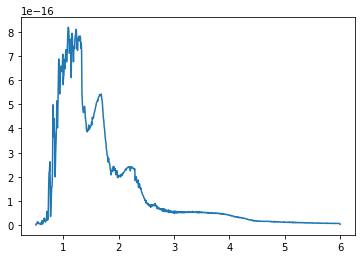

In [54]:
plt.plot(wl_um,flux_bin_s[14])

In [55]:
sim_x = [6.47e-1, 7.63e-1, 9.02e-1, 1.24e+0, 1.65e+0, 2.19e+0, 3.35e+0]*u.um
sim_y = [5.34e-12, 1.72e-11, 5.68e-11, 8.71e-11, 5.97e-11, 3.06e-11, 7.67e-12]*u.erg/(u.s * u.cm**2 * u.um)
x_error = [0.1297,0.1291, 0.1326, 0.15, 0.24, 0.54, 0.66]*u.um

In [56]:
y_flux_bin = (sim_y * x_error).to(u.W/u.m**2)

In [57]:
wl_min = sim_x - x_error*0.5
wl_max = sim_x + x_error*0.5

In [58]:
ind_checksim = []
for i in range(len(sim_x)):
    ind_checksim.append(np.where((wl_um/u.um < wl_max[i]/u.um) & (wl_um/u.um > wl_min[i]/u.um)))

In [59]:
check_sim_ph = []
for i in range(len(ind_checksim)):
    check_sim_ph.append(np.sum(np.array(flux_bin_s[14])[ind_checksim[i][0]]))


In [60]:
y_flux_bin#sim

<Quantity [6.92598e-16, 2.22052e-15, 7.53168e-15, 1.30650e-14, 1.43280e-14,
           1.65240e-14, 5.06220e-15] W / m2>

In [61]:
check_sim_ph#phoneix

[3.7752832320018756e-16,
 3.720955165805174e-15,
 9.93956772485926e-15,
 1.7421561835730435e-14,
 1.7214171589329735e-14,
 1.653533873310862e-14,
 5.291934665124865e-15]

(array([-2.50e-15,  0.00e+00,  2.50e-15,  5.00e-15,  7.50e-15,  1.00e-14,
         1.25e-14,  1.50e-14,  1.75e-14,  2.00e-14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

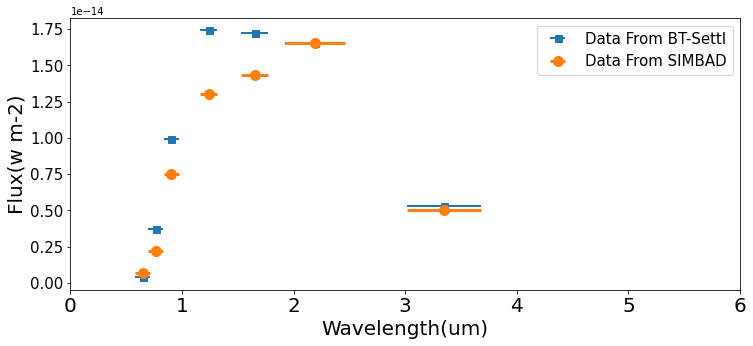

In [62]:
fig1 = plt.figure(figsize=(12,5))

ax5 = fig1.add_subplot(1,1,1)
#ax5.plot(sim_x, sim_band,'^',color = '#ff7f0e',markersize=10,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
ax5.errorbar(sim_x, check_sim_ph, xerr = x_error*0.5,color = '#1f77b4', fmt ='s',markersize=7,label="Data From BT-Settl",linewidth=2)
ax5.errorbar(sim_x, y_flux_bin, xerr = x_error*0.5,color = '#ff7f0e', fmt ='o',markersize=10,label="Data From SIMBAD",linewidth=3)
'#9467bd'
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)



plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 20})
plt.legend(prop={'size': 15})
plt.ylabel("Flux(w m-2)",fontdict={ 'size'   : 20})
plt.xlim(0,6)
plt.xticks(size = 20)
plt.yticks(size = 15)

In [63]:
check_1 = check_sim_ph-y_flux_bin.value
abs_check_1 = [abs(i) for i in check_1]
np.mean(np.array(abs_check_1) /np.array(check_sim_ph))

0.2774112538660582

In [64]:
sim_x #R, i, Z, J, H, K, W1

<Quantity [0.647, 0.763, 0.902, 1.24 , 1.65 , 2.19 , 3.35 ] um>

In [65]:
re_1 = ((np.array(y_flux_bin)-np.array(check_sim_ph))/np.array(check_sim_ph))*100

In [66]:
re_1

array([ 8.34559045e+01, -4.03239249e+01, -2.42252761e+01, -2.50067237e+01,
       -1.67662532e+01, -6.85727295e-02, -4.34122263e+00])

In [67]:
check_sim_ph

[3.7752832320018756e-16,
 3.720955165805174e-15,
 9.93956772485926e-15,
 1.7421561835730435e-14,
 1.7214171589329735e-14,
 1.653533873310862e-14,
 5.291934665124865e-15]

(array([1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

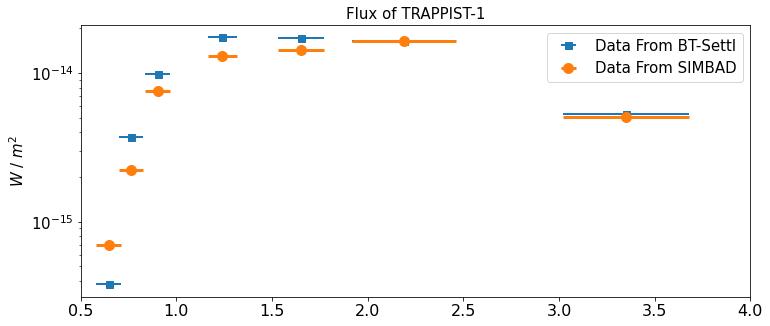

In [68]:
fig1 = plt.figure(figsize=(12,5))

ax5 = fig1.add_subplot(1,1,1)
#ax5.plot(sim_x, sim_band,'^',color = '#ff7f0e',markersize=10,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
ax5.errorbar(sim_x, check_sim_ph, xerr = x_error*0.5,color = '#1f77b4', fmt ='s',markersize=7,label="Data From BT-Settl",linewidth=2)
ax5.errorbar(sim_x, y_flux_bin, xerr = x_error*0.5,color = '#ff7f0e', fmt ='o',markersize=10,label="Data From SIMBAD",linewidth=3)
'#9467bd'
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)

#plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 25})
plt.title("Flux of TRAPPIST-1",fontdict={ 'size'   : 15})
plt.legend(prop={'size': 15})
plt.ylabel(r'$W\ /\ m^2 $',fontdict={ 'size'   : 15})
plt.yscale("log") 
plt.xlim(0.5,4)
plt.xticks(size = 16)
plt.yticks(size = 15)

([<matplotlib.axis.YTick at 0x166c35160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

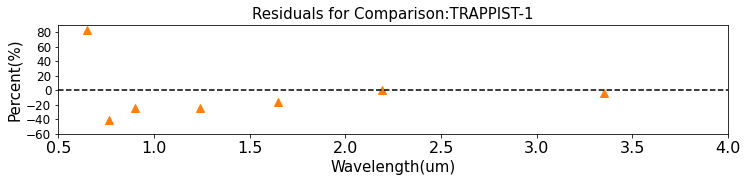

In [69]:
fig1 = plt.figure(figsize=(12,2))

ax5 = fig1.add_subplot(1,1,1)
ax5.plot(sim_x, re_1,'^',color = '#ff7f0e',markersize=8,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)
plt.axhline(y = 0, color = 'black', linestyle = '--')


plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 15})
plt.title("Residuals for Comparison:TRAPPIST-1",fontdict={ 'size'   : 15})
#plt.legend(prop={'size': 15})
plt.ylabel("Percent(%)",fontdict={ 'size'   : 15})
plt.xlim(0.5,4)
plt.xticks(size = 16)
plt.yticks(np.arange(-60, 100, 20),size = 12)

([<matplotlib.axis.YTick at 0x16c980d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

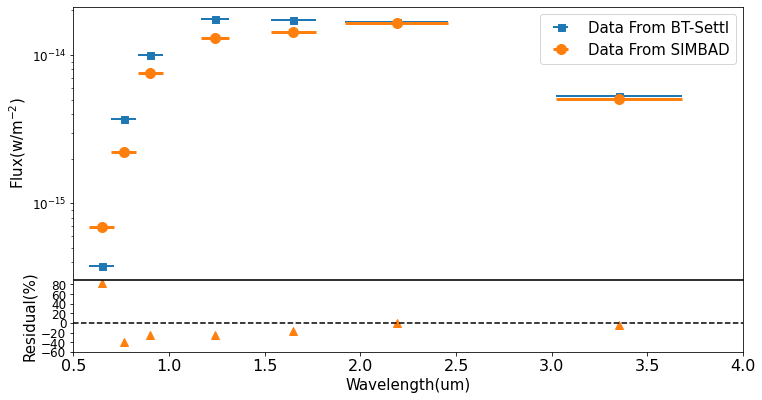

In [139]:
fig1 = plt.figure(figsize=(12,5))

ax5 = fig1.add_subplot(1,1,1)
#ax5.plot(sim_x, sim_band,'^',color = '#ff7f0e',markersize=10,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
ax5.errorbar(sim_x, check_sim_ph, xerr = x_error*0.5,color = '#1f77b4', fmt ='s',markersize=7,label="Data From BT-Settl",linewidth=2)
ax5.errorbar(sim_x, y_flux_bin, xerr = x_error*0.5,color = '#ff7f0e', fmt ='o',markersize=10,label="Data From SIMBAD",linewidth=3)
'#9467bd'
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)



#plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 25})
#plt.title("Flux of TRAPPIST-1",fontdict={ 'size'   : 15})
plt.legend(prop={'size': 15})
plt.ylabel(r'Flux(w/m$^{-2}$)',fontdict={ 'size'   : 15})
plt.yscale("log") 
plt.xlim(0.5,4)
#plt.xticks(size = 25)
plt.yticks(size = 12)
plt.xticks([])
frame2=fig1.add_axes((.125,-.0785,.775,.2))
plt.plot(sim_x, re_1,'^',color = '#ff7f0e',markersize=8,label="Data From SIMBAD")
plt.axhline(y = 0, color = 'black', linestyle = '--')
frame2.set_ylabel('$Residual$',fontsize=20)
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 15})
#plt.title("Residuals for Comparison:TRAPPIST-1",fontdict={ 'size'   : 15})
#plt.legend(prop={'size': 15})
plt.ylabel('Residual(%)',fontdict={ 'size'   : 15})
plt.xlim(0.5,4)
plt.xticks(size = 16)
plt.yticks(np.arange(-60, 100, 20),size = 12)
#plt.xlabel('$2s+d_0$ $(m)$',fontsize=20)

In [71]:
sim_x2 = [1.248, 1.633,2.19, 3.776, 4.670]*u.um #j, h, K, L, M
range_x = [0.163, 0.296, 0.336, 0.7, 0.241]*u.um
flux_sky = [2.82818411e-20,1.74330014e-19,2.5458731e-20,5.46272019e-17,1.39196471e-16]
flux_keck = [1.9960046 * 10**(-19),1.9902009 * 10**(-19), 1.5534365 * 10**(-19), 3.2946624 * 10**(-16),  
4.4948984*10**(-16)]

In [72]:
re_s=((np.array(flux_keck)-np.array(flux_sky))/np.array(flux_sky))*100

In [73]:
flux_keck

[1.9960046e-19,
 1.9902009e-19,
 1.5534365000000002e-19,
 3.2946624e-16,
 4.494898400000001e-16]

(array([1.e-21, 1.e-20, 1.e-19, 1.e-18, 1.e-17, 1.e-16, 1.e-15, 1.e-14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

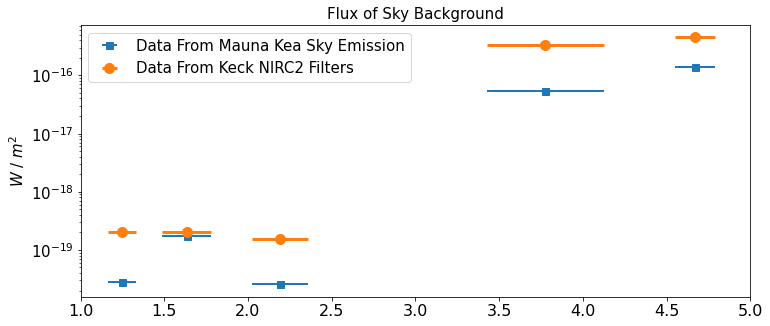

In [74]:
fig1 = plt.figure(figsize=(12,5))

ax5 = fig1.add_subplot(1,1,1)
#ax5.plot(sim_x, sim_band,'^',color = '#ff7f0e',markersize=10,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
ax5.errorbar(sim_x2, flux_sky, xerr = range_x*0.5,color = '#1f77b4', fmt ='s',markersize=7,label="Data From Mauna Kea Sky Emission",linewidth=2)
ax5.errorbar(sim_x2, flux_keck, xerr = range_x*0.5,color = '#ff7f0e', fmt ='o',markersize=10,label="Data From Keck NIRC2 Filters",linewidth=3)
'#9467bd'
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)



#plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 25})
plt.xlim(1,5)
plt.title("Flux of Sky Background",fontdict={ 'size'   : 15})
plt.legend(prop={'size': 15})
plt.ylabel(r'$W\ /\ m^2 $',fontdict={ 'size'   : 15})
plt.yscale("log") 
plt.xticks(size = 16)
plt.yticks(size = 15)

(array([-200.,    0.,  200.,  400.,  600.,  800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

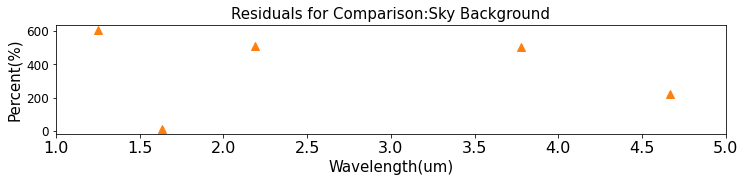

In [75]:
fig1 = plt.figure(figsize=(12,2))

ax5 = fig1.add_subplot(1,1,1)
ax5.plot(sim_x2, re_s,'^',color = '#ff7f0e',markersize=8,label="Data From SIMBAD")
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)
#plt.axhline(y = 0, color = 'black', linestyle = '--')


plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 15})
plt.title("Residuals for Comparison:Sky Background",fontdict={ 'size'   : 15})
#plt.legend(prop={'size': 15})
plt.ylabel("Percent(%)",fontdict={ 'size'   : 15})
plt.xlim(1,5)
plt.xticks(size = 16)
plt.yticks(size = 12)

In [76]:
check_1 = check_sim_ph-y_flux_bin.value
abs_check_1 = [abs(i) for i in check_1]
np.mean(np.array(abs_check_1) /np.array(check_sim_ph))

0.2774112538660582

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

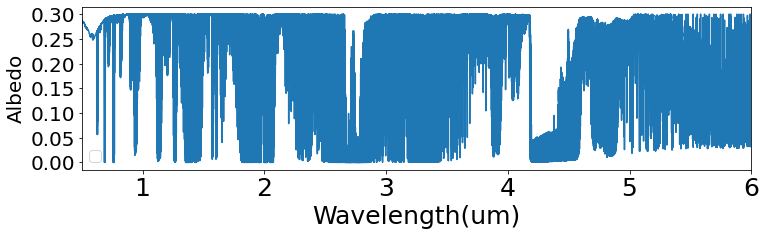

In [77]:
fig1 = plt.figure(figsize=(12,3))

ax5 = fig1.add_subplot(1,1,1)
ax5.plot(absor1.nm[1:1079300]/1000, modern_earth_abd_fit,color = '#1f77b4')
#ax5.plot(wl_um3, band_phe,'s',color = '#1f77b4',markersize=10,label="Data From Phnoeix")
#ax5.plot(wl_um3, band_bd,'o',color = '#9467bd',markersize=10,label="Data From Blackbody")
#ax5.errorbar(sim_x2, flux_sky, xerr = range_x*0.5,color = '#1f77b4', fmt ='s',markersize=7,label="Data From Mauna Kea",linewidth=2)
#ax5.errorbar(sim_x2, flux_keck, xerr = range_x*0.5,color = '#ff7f0e', fmt ='o',markersize=10,label="Data From SIMBAD",linewidth=3)
'#9467bd'
#ax5.plot(f_tra1_um, f_tra1_fum2,'o',color = '#1f77b4',markersize=2,label="Data From Blackbody")
#ax5.plot(sim_x, y_flux_bin,'o',color = '#9467bd',markersize=7,label="Data From SIMBAD",linewidth=2)



plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 25})
plt.legend(prop={'size': 15})
plt.ylabel("Albedo",fontdict={ 'size'   : 20}) 
plt.xlim(0.5,6)
plt.xticks(size = 25)
plt.yticks(size = 20)

# BD in band

In [78]:
sim_x = [6.47e-1, 7.63e-1, 9.02e-1, 1.24e+0, 1.65e+0, 2.19e+0, 3.35e+0]*u.um
sim_y = [5.34e-12, 1.72e-11, 5.68e-11, 8.71e-11, 5.97e-11, 3.06e-11, 7.67e-12]*u.erg/(u.s * u.cm**2 * u.um)
x_error = [0.1297,0.1291, 0.1326, 0.15, 0.24, 0.54, 0.66]*u.um

In [58]:
check_sim_ph = []
for i in range(len(ind_checksim)):
    check_sim_ph.append(np.sum(np.array(flux_bin_s[14])[ind_checksim[i][0]]))

In [59]:
y_flux_bin = (sim_y * x_error).to(u.W/u.m**2)

In [60]:
wl_min = sim_x - x_error*0.5
wl_max = sim_x + x_error*0.5

In [61]:
ind_checksim = []
for i in range(len(sim_x)):
    ind_checksim.append(np.where((wl_um_check/u.um < wl_max[i]/u.um) & (wl_um_check/u.um > wl_min[i]/u.um)))

In [62]:
check_sim_bd = []
for i in range(len(ind_checksim)):
    check_sim_bd.append(np.sum(np.array(pn_tbd_1e_tot[ind_checksim[i][0]])))

In [63]:
(np.array(check_sim_bd)-np.array(check_sim_sim))/np.array(check_sim_sim)

NameError: name 'check_sim_sim' is not defined

In [ ]:
check_sim_sim = []
for i in range(len(ind_checksim)):
    check_sim_sim.append(np.sum(pn_14e_elt[ind_checksim[i][0]]))

In [ ]:
check_sim_sim

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(wl_um_check,pn_14e_elt,linewidth=3,label="Data From BT-Settl" ,color = '#1f77b4')
plt.plot(wl_um_check, pn_tbd_1e_tot,'-',color = '#ff7f0e', label="Data From Blackbody",linewidth=3)
#plt.plot(sim_x, sim_y,'o',color = '#ff7f0e', label ='Data come from SIMBAD')
#plt.plot(wl_um, obd_tra1_erg,'-',color = 'red')
#plt.errorbar(wl_um_eb ,er_y,yerr= np.array(er_er2),fmt = 'o',color = '#ff7f0e')
plt.legend()
plt.xlabel("Wavelength(um)",fontdict={ 'size'   : 16})
plt.ylabel("$Photon\ number$",fontdict={ 'size'   : 16})
plt.xlim(0,6)
#plt.title("ELT-R150-TRA1e")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(prop={'size': 15})